# Access NetCDF Files

This workstation can be used as a client computer to access NetCDF files that are distributed using CernVM-FS.

The files are available in the `/cvmfs/netcdftest.usq` folder on this computer.

To automatically mount the remote files on this computer all you need to do is try accessing that folder. A simple folder list command is enough to trigger the auto-mpunt process.

In [1]:
!ls /cvmfs/netcdftest.usq

1976.monthly_rain.nc  cdi_1.nc	cdi_6.nc  exampleFiles
cdi_12.nc	      cdi_3.nc	cdi_9.nc  README.txt


## Seeing Changes You Made on the Server

If you have made changes on the server, you need to ask CernVM-FS on this computer to refresh. To do that, you need to run the `cvmfs_config reload` command, with the name of the repository.

* The `cvmfs_config` tool is used to manage the CernVM-FS client on this computer.
* The `reload` command asks the CernVM-FS client to update its list of files and folders.
* The `sudo` command is used before the other commands to run with administrative permissions.

In [2]:
!sudo cvmfs_config reload netcdftest.usq

Connecting to CernVM-FS loader... done
Entering maintenance mode
Draining out kernel caches (up to 60s)
Blocking new file system calls
Waiting for active file system calls
Saving inode tracker
Saving negative entry cache
Saving chunk tables
Saving inode generation
Saving open files table
Unloading Fuse module
Re-Loading Fuse module
Restoring inode tracker...  done
Restoring negative entry cache...  done
Restoring chunk tables...  done
Restoring inode generation...  done
Restoring open files table... done
Restoring open files counter...  done
Releasing saved glue buffer
Releasing saved negative entry cache
Releasing chunk tables
Releasing saved inode generation info
Releasing saved open files table
Releasing open files counter
Activating Fuse module


<div class="alert alert-block alert-warning">
<b>IMPORTANT:</b> You must run the `cvmfs_config reload` command before you can see changes you have made on the server. For that reason, it is always suggested to run this command at the beginning of any script, or before running any application or tool that needs to access the latest NetCDF files.
</div>

<div class="alert alert-block alert-info">
<b>NOTE:</b> Changes on the server can take up to 5 minutes to be visible on the client computers. If you ran <b><i>cvmfs_config reload</b></i> and you don't see a change you made on the server, run it again in a few minutes.
</div>

In [3]:
!ls /cvmfs/netcdftest.usq

1976.monthly_rain.nc  README.txt  cdi_1.nc  exampleFiles


In [4]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

Bad pipe message: %s [b'\xe7o\xe1Q`\x97\xcam', b'\xfbZ\xc7:\x1d|\x8au \xae_V\xbdI\xa2\x822\xdc\xc4\xb6W\x7f\xe5\x92\xb3<kR\xde\xad&\xf7\xce\xf7G\xe1\x94\xaaMG\x84\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06\x01\x00+\x00\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$']
Bad pipe message: %s [b"\x84Sx\xe1\x943\x1f\xc4^jT\xc3\xdb\xc5i\xff\x19\xca\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\x

We specify the file that we want to read and its path

In [5]:
file2read = '/cvmfs/netcdftest.usq/1976.monthly_rain.nc'

Load the file into a variable "nc" using netCDF4 library

In [6]:
nc = netCDF4.Dataset(file2read)

Print all variable keys in the file

In [7]:
print(nc.variables.keys())

dict_keys(['lat', 'lon', 'time', 'monthly_rain', 'crs'])


We print all dimensions (one per line)

In [8]:
for dims in nc.dimensions.items():
    print(dims)

('lat', <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 681)
('lon', <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 841)
('time', <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 12)


In [9]:
print(nc.variables.items())

dict_items([('lat', <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    long_name: latitude
    standard_name: latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (681,)
filling on, default _FillValue of 9.969209968386869e+36 used), ('lon', <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    long_name: longitude
    standard_name: longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (841,)
filling on, default _FillValue of 9.969209968386869e+36 used), ('time', <class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    calendar: standard
    axis: T
    units: days since 1976-01-01
unlimited dimensions: time
current shape = (12,)
filling on, default _FillValue of 9.969209968386869e+36 used), ('monthly_rain', <class 'netCDF4._netCDF4.Variable'>
int16 monthly_rain(time, lat, lon)
    _FillValue: -32767
    long_name: Monthly rainfall
    units: mm
    scale_factor: 0.1
    add_offset: 3276.5
    valid_min: -32765
 

In [10]:
for name, variable in nc.variables.items():
    print('____________________________________________')
    for attrname in variable.ncattrs():
        print("{} --{}".format(attrname, getattr(variable, attrname)))

____________________________________________
long_name --latitude
standard_name --latitude
units --degrees_north
axis --Y
____________________________________________
long_name --longitude
standard_name --longitude
units --degrees_east
axis --X
____________________________________________
calendar --standard
axis --T
units --days since 1976-01-01
____________________________________________
_FillValue ---32767
long_name --Monthly rainfall
units --mm
scale_factor --0.1
add_offset --3276.5
valid_min ---32765
valid_max --32767
____________________________________________
long_name --Coordinate reference system
grid_mapping_name --latitude_longitude
longitude_of_prime_meridian --0.0
semi_major_axis --6378137.0
inverse_flattening --298.257223563


In [11]:
lats = nc.variables['lat'][:]; lons = nc.variables['lon'][:]

In [12]:
print(lats)

[-44.   -43.95 -43.9  -43.85 -43.8  -43.75 -43.7  -43.65 -43.6  -43.55
 -43.5  -43.45 -43.4  -43.35 -43.3  -43.25 -43.2  -43.15 -43.1  -43.05
 -43.   -42.95 -42.9  -42.85 -42.8  -42.75 -42.7  -42.65 -42.6  -42.55
 -42.5  -42.45 -42.4  -42.35 -42.3  -42.25 -42.2  -42.15 -42.1  -42.05
 -42.   -41.95 -41.9  -41.85 -41.8  -41.75 -41.7  -41.65 -41.6  -41.55
 -41.5  -41.45 -41.4  -41.35 -41.3  -41.25 -41.2  -41.15 -41.1  -41.05
 -41.   -40.95 -40.9  -40.85 -40.8  -40.75 -40.7  -40.65 -40.6  -40.55
 -40.5  -40.45 -40.4  -40.35 -40.3  -40.25 -40.2  -40.15 -40.1  -40.05
 -40.   -39.95 -39.9  -39.85 -39.8  -39.75 -39.7  -39.65 -39.6  -39.55
 -39.5  -39.45 -39.4  -39.35 -39.3  -39.25 -39.2  -39.15 -39.1  -39.05
 -39.   -38.95 -38.9  -38.85 -38.8  -38.75 -38.7  -38.65 -38.6  -38.55
 -38.5  -38.45 -38.4  -38.35 -38.3  -38.25 -38.2  -38.15 -38.1  -38.05
 -38.   -37.95 -37.9  -37.85 -37.8  -37.75 -37.7  -37.65 -37.6  -37.55
 -37.5  -37.45 -37.4  -37.35 -37.3  -37.25 -37.2  -37.15 -37.1  -37.05
 -37. 

In [13]:
print(lons)

[112.   112.05 112.1  112.15 112.2  112.25 112.3  112.35 112.4  112.45
 112.5  112.55 112.6  112.65 112.7  112.75 112.8  112.85 112.9  112.95
 113.   113.05 113.1  113.15 113.2  113.25 113.3  113.35 113.4  113.45
 113.5  113.55 113.6  113.65 113.7  113.75 113.8  113.85 113.9  113.95
 114.   114.05 114.1  114.15 114.2  114.25 114.3  114.35 114.4  114.45
 114.5  114.55 114.6  114.65 114.7  114.75 114.8  114.85 114.9  114.95
 115.   115.05 115.1  115.15 115.2  115.25 115.3  115.35 115.4  115.45
 115.5  115.55 115.6  115.65 115.7  115.75 115.8  115.85 115.9  115.95
 116.   116.05 116.1  116.15 116.2  116.25 116.3  116.35 116.4  116.45
 116.5  116.55 116.6  116.65 116.7  116.75 116.8  116.85 116.9  116.95
 117.   117.05 117.1  117.15 117.2  117.25 117.3  117.35 117.4  117.45
 117.5  117.55 117.6  117.65 117.7  117.75 117.8  117.85 117.9  117.95
 118.   118.05 118.1  118.15 118.2  118.25 118.3  118.35 118.4  118.45
 118.5  118.55 118.6  118.65 118.7  118.75 118.8  118.85 118.9  118.95
 119. 

In [14]:
latselect = np.logical_and(lats > -20, lats < -15)

In [15]:
lonselect = np.logical_and(lons > 140, lons < 150)

In [16]:
data = nc.variables['monthly_rain'][1, latselect, lonselect]

Flip latitudes so they go south -> north

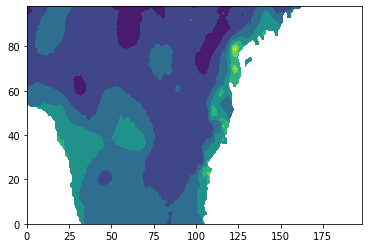

In [17]:
plt.contourf(data[::-1])   
plt.show()